In [1]:
import numpy as np
import sys, os, git, lammps_logfile
import warnings
warnings.filterwarnings("ignore")

In [2]:
current_path = os.getcwd()
git_repo = git.Repo(current_path, search_parent_directories=True)
git_path = git_repo.git.rev_parse("--show-toplevel")
path_in_folder = current_path[len(git_path)+1:]
sys.path.append(git_path + "/files/shared-pyplot")
from plttools import PltTools
path_figures = git_path + "/figures/"

In [3]:
color1 = np.array([1, 0.682, 0.286])
color2 = np.array([0.008, 0.294, 0.478])
color3 = np.array([0.267, 0.647, 0.761])
color4 = np.array([0.5, 0.5, 0.5])

In [31]:
log = lammps_logfile.File("generate.log")
timestep = 1

time, vol, dens, temp = [], [], [], []
for i in [0, 1, 2]:
    time.append(log.get("Step", run_num=i)*timestep/1000) # ps
    vol.append(log.get("Volume", run_num=i))
    dens.append(log.get("Density", run_num=i))
    temp.append(log.get("Temp", run_num=i))

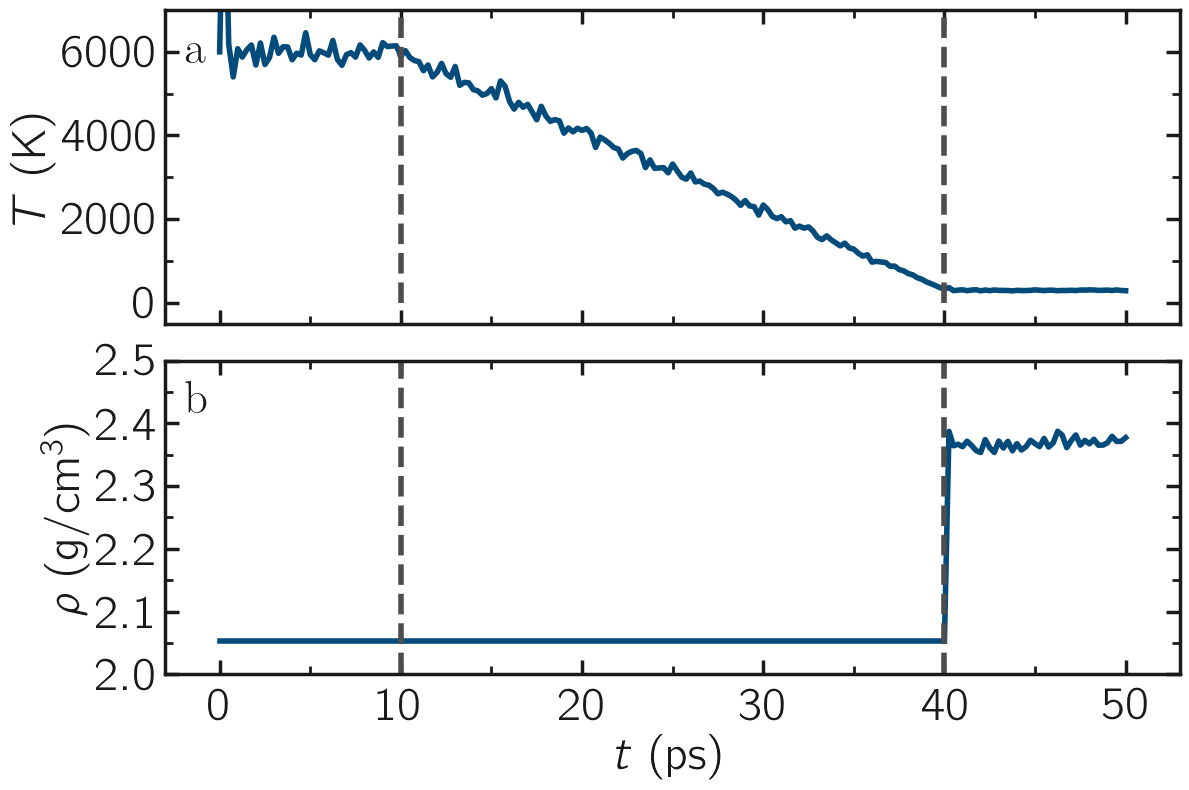

In [ ]:
filename = "GCMC-dimension"

# Initialise figure
myplt = PltTools()
myplt.prepare_figure(fig_size = (12,8), dark_mode = False,
                     transparency = False, use_serif=False, n_colone=1, n_line=2)

# Panel a
myplt.add_panel()
for i in [0, 1, 2]:
    myplt.add_plot(x = time[i], y = temp[i], type = "plot", linewidth_data = 3,
                marker = "-", data_color = color2, markersize = 12)
x = np.linspace(0, 7000)
myplt.add_plot(x = x*0+10, y = x, type = "plot", linewidth_data = 3,
            marker = "--", data_color = np.array([0.3, 0.3, 0.3]), markersize = 12)
myplt.add_plot(x = x*0+40, y = x, type = "plot", linewidth_data = 3,
            marker = "--", data_color = np.array([0.3, 0.3, 0.3]), markersize = 12)
myplt.complete_panel(ylabel = r'$T ~ (\mathrm{K})$',
                     xlabel = None, xpad = 10, legend=True, handlelength_legend=1)
myplt.set_boundaries(x_ticks=np.arange(0, 55, 10), y_ticks=np.arange(0, 7201, 2000),
                    x_boundaries=(-3, 53), y_boundaries=(-500, 7000))

# Panel b
myplt.add_panel()
for i in [0, 1, 2]:
    myplt.add_plot(x = time[i], y = dens[i], type = "plot", linewidth_data = 3,
                marker = "-", data_color = color2, markersize = 12)
x = np.linspace(0, 7000)
myplt.add_plot(x = x*0+10, y = x, type = "plot", linewidth_data = 3,
            marker = "--", data_color = np.array([0.3, 0.3, 0.3]), markersize = 12)
myplt.add_plot(x = x*0+40, y = x, type = "plot", linewidth_data = 3,
            marker = "--", data_color = np.array([0.3, 0.3, 0.3]), markersize = 12)
myplt.complete_panel(ylabel = r'$\rho ~ (\mathrm{g}/\mathrm{cm}^3)$',
                     xlabel = r'$t~(\mathrm{ps})$', xpad = 10, legend=True, handlelength_legend=1)
myplt.set_boundaries(x_ticks=np.arange(0, 55, 10), y_ticks=np.arange(2, 2.51, 0.1),
                    x_boundaries=(-3, 53), y_boundaries=(2, 2.5))

# Print figure
myplt.add_subplotlabels()
myplt.save_figure(filename = filename, saving_path = path_figures)

In [77]:
all_rdf = []
for line in open("rdf.dat"):
    if len(line.split(" ")) == 2:
        time = line.split(" ")[0]
        data = []
    if len(line.split(" ")) == 4:
        # print(line.split(" "))
        data.append([np.float32(line.split(" ")[1]),
                     np.float32(line.split(" ")[2])])
        all_rdf.append(data)

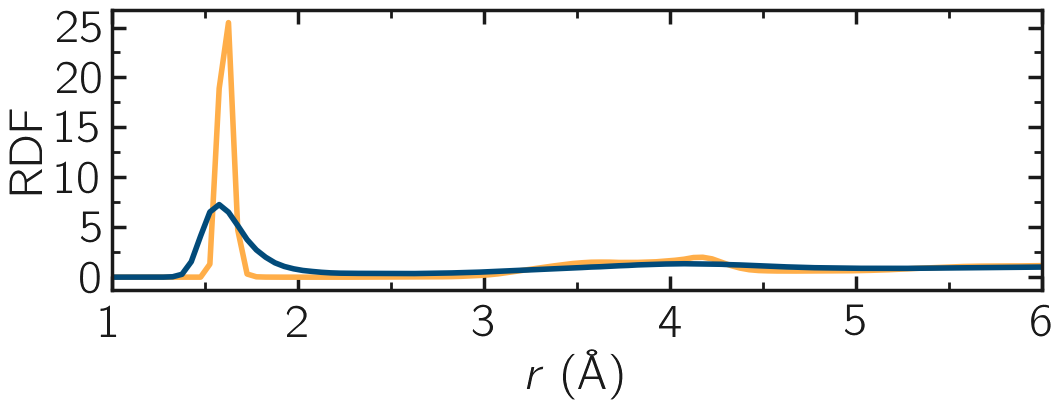

In [90]:
filename = "GCMC-rdf"

# Initialise figure
myplt = PltTools()
myplt.prepare_figure(fig_size = (12,8), dark_mode = False,
                     transparency = False, use_serif=False, n_colone=1, n_line=2)

# Panel a
myplt.add_panel()

rdf = np.array(all_rdf[-1])
myplt.add_plot(x = rdf[:,0], y = rdf[:,1], type = "plot", linewidth_data = 3,
            marker = "-", data_color = color1, markersize = 12)


rdf = np.array(all_rdf[0])
myplt.add_plot(x = rdf[:,0], y = rdf[:,1], type = "plot", linewidth_data = 3,
            marker = "-", data_color = color2, markersize = 12)

myplt.complete_panel(ylabel = r'$\mathrm{RDF}$', # ~ (\mathrm{g}/\mathrm{cm}^3)$',
                     xlabel = r'$r~(\mathrm{\AA{}})$', xpad = 10, legend=True, handlelength_legend=1)
myplt.set_boundaries(x_ticks=np.arange(1, 6.1, 1), # y_ticks=np.arange(2, 2.51, 0.1),
                    x_boundaries=(1, 6)) #y_boundaries=(2, 2.5))
